# Python 3 Project Analysing Women's Football Data

I decided on this project because when researching projects to learn Pandas and Jupyter Notebooks, I found many related to mens sports but far less about women's sport. With the FIFA Women's World Cup taking place this Summer, I wanted to analyse and visualise data from previous games.

Lets start by importing and cleaning the data. We need to make sure there aren't any problems that could affect the prediction.

## Importing Libraries

The first step is to import the Libraries I will eed to analyse and visualise the data. I will be using numpy, pandas and plotly.

In [80]:
# Library Imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go

## Data Preparation

Now, we need to prepare our data. This involves checking for any missing values and checking that the data types of each object are what we need.

In [81]:
# Read in the data
game_data = pd.read_csv("data/results.csv")

In [82]:
# Clean the data 
# This will tell me the number of items in each column that has an NA value
game_data.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Our dataset is complete! Now let's check the datatypes.

In [83]:
game_data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

Most of the columns are of the correct datatype. The `date` column needs to be of type `datetime` for us to be able to split out the year later on in my analysis. Let's change the datatype of `date`.

In [84]:
game_data["date"] = pd.to_datetime(game_data["date"])
game_data.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

Now that our data is prepared, lets show what the data table looks like.

In [85]:
#Sort values by date and display the oldest 5 games in the notebook 
game_data.sort_values("date").head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


# Adding New Columns

Now make it easier to identify the results of each match: wins, draws and losses. We can do this by adding a new column identifying if the home team won, drew or lost their game. We can also add a new column for goal difference.

In [86]:
# Add a new column showing the result
# Show conditions for win, loss or draw for the home team
c1 = game_data['home_score'].eq(game_data['away_score'])
c2 = game_data['home_score'] > game_data['away_score']

# Assign win, draw or loss value dependent on the score of the game as given in the conditions above
game_data['home result'] = np.select([c1, c2], ['Draw', 'Win'], 'Loss')
game_data.sort_values("date").head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home result
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,Win
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,Win
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,Win
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,Win
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,Win


In [87]:
# Add a new column showing goal difference for the home team
game_data['goal difference'] = game_data['home_score'] - game_data['away_score']
game_data.sort_values("date").head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home result,goal difference
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,Win,1
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,Win,1
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,Win,2
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,Win,2
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,Win,1


Now that we have all the columns we need, let's remove any columns we won't be using to keep our dataset tidy.

In [88]:
# Remove the columns showing the home and away score, and the city and country.
game_data = game_data.drop(['home_score', 'away_score', 'country', 'tournament', 'city', 'neutral'], axis=1)
game_data.sort_values("date").head()

,date,home_team,away_team,home result,goal difference
0,1969-11-01,Italy,France,Win,1
1,1969-11-01,Denmark,England,Win,1
2,1969-11-02,England,France,Win,2
3,1969-11-02,Italy,Denmark,Win,2
4,1975-08-25,Thailand,Australia,Win,1


## Data Visualisation using Pandas functionality

First, I want to visualise the spread of results across all matches. Let's do this in a pie chart splitting out wins, draws and losses using Pandas' `plot` function to give us basic information.

<Axes: title={'center': 'Home Results'}, ylabel='count'>

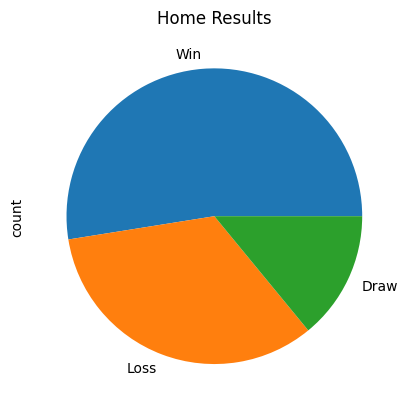

In [89]:
# Visualise results using built in functions
game_data["home result"].value_counts().plot.pie(title='Home Results')

In [90]:
print(game_data["home result"].value_counts())

home result
Win     2565
Loss    1633
Draw     686
Name: count, dtype: int64


Pandas `plot` function also allows us to plot bar charts. Let's plot a bar chart showing the distribution of goal differences in all the matches. _Notice how the axis doesn't automatically go in numerical order, but instead plots most common to least common goal differences._

<Axes: title={'center': 'Goal Differences'}, xlabel='goal difference'>

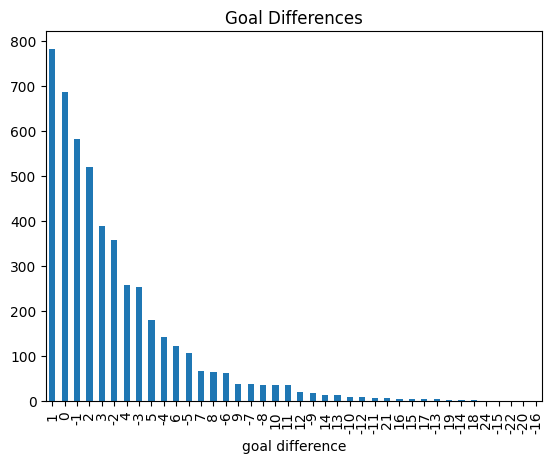

In [91]:
# Visualise goal difference
game_data['goal difference'].value_counts().plot.bar(title='Goal Differences')

## England Match Data

I want to focus in on data relating to England matches, both home and away.
Let's create a new dataframe that just contains data from England games.

In [92]:
# Create new data frames for home and away England games
data_england_home = game_data[game_data['home_team']== 'England']
data_england_away = game_data[game_data['away_team']== 'England']

# Merge these into one large data set to contain all England game data
england_game_data = [data_england_home, data_england_away]
england_games = pd.concat(england_game_data)
england_games.sort_values("date")
england_games = england_games.reset_index(drop=True)
england_games

,date,home_team,away_team,home result,goal difference
0,1969-11-02,England,France,Win,2
1,1979-07-19,England,Finland,Win,2
2,1979-07-23,England,Switzerland,Win,2
3,1982-09-19,England,Northern Ireland,Win,6
4,1983-05-22,England,Scotland,Win,2
...,...,...,...,...,...
204,2019-03-05,Japan,England,Loss,-3
205,2019-06-19,Japan,England,Loss,-2
206,2019-06-27,Norway,England,Loss,-3
207,2020-03-05,United States,England,Win,2


We can now see that England have played in 209 games in our dataset. But how many did then win, lose or draw? We can use the `.count()` function to find out.

In [93]:
# Count Home and Away Wins
england_home_wins = data_england_home[data_england_home['home result']=='Win']['date'].count()
england_away_wins = data_england_away[data_england_away['home result']=='Loss']['date'].count()

# Count Home and Away Losses
england_home_losses = data_england_home[data_england_home['home result']=='Loss']['date'].count()
england_away_losses = data_england_away[data_england_away['home result']=='Win']['date'].count()

# Count Home and Away Draws
england_home_draws = data_england_home[data_england_home['home result']=='Draw']['date'].count()
england_away_draws = data_england_away[data_england_away['home result']=='Draw']['date'].count()

# Count total wins, draws and losses
england_wins = england_home_wins + england_away_wins
england_draws = england_home_draws+ england_away_draws
england_losses = england_home_losses + england_away_losses

england_games_total = england_wins + england_draws + england_losses
win_rate = round((england_wins/ england_games_total) * 100)

print("England won " + str(england_wins) +" games, drew " + str(england_draws) +" games and lost " + str(england_losses) + " games. In total, England played " + str(england_games_total) + " games and have a win rate of " + str(win_rate) + "%.")


England won 123 games, drew 33 games and lost 53 games. In total, England played 209 games and have a win rate of 59%.


## Using Plotly

I now want to use the Plotly library to visualise data around England games. 

Let's start by looking at Wins, Losses and Draws. What is the split like overall, and between home and away matches?

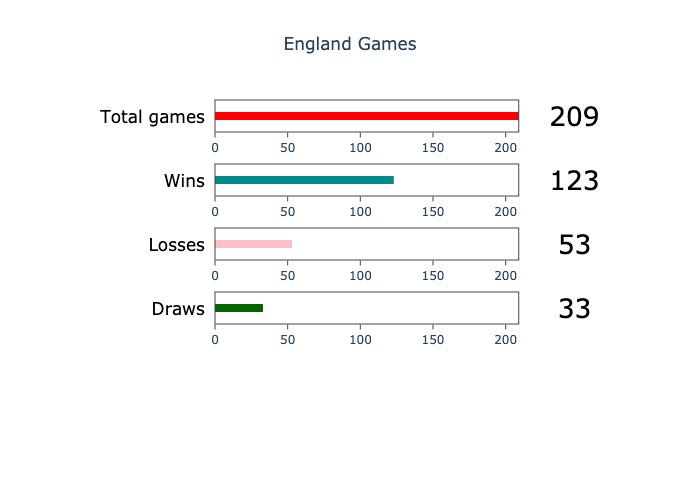

In [94]:
# Using plotly
# Overall outcomes of games

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_games_total,
    domain = {'x': [0.25, 1], 'y': [0.9, 1.0]},
    title = {'text': "Total games",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_games_total]},
        'bar': {'color': "red"}}))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_wins,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.8]},
    title = {'text': "Wins",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_games_total]},
        'bar': {'color': "darkcyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = england_losses,
    domain = {'x': [0.25, 1], 'y': [0.5, 0.6]},
    title = {'text': "Losses",'font':{'color': 'black','size':17}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,england_games_total]},
        'bar': {'color': "pink"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = england_draws,
    domain = {'x': [0.25, 1], 'y': [0.3, 0.4]},
    title = {'text' :"Draws",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,england_games_total]},
        'bar': {'color': "darkgreen"}}
))

fig.update_layout(title=" England Games ",title_x=0.5)
fig.show("png")

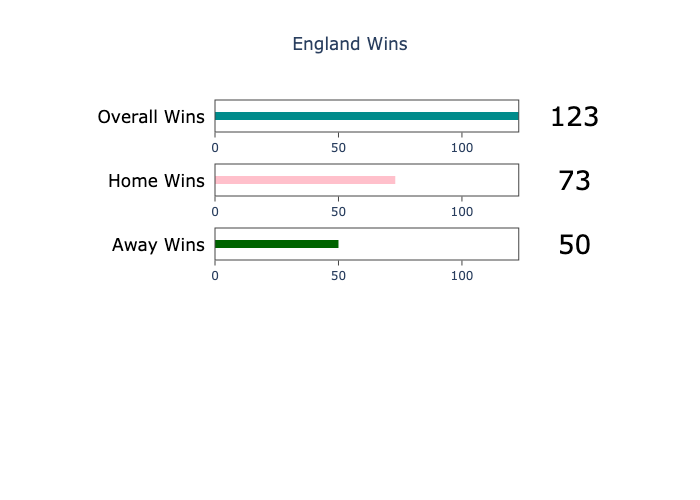

In [95]:
# Win split

fig1 = go.Figure()

fig1.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_wins,
    domain = {'x': [0.25, 1], 'y': [0.9, 1]},
    title = {'text': "Overall Wins",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_wins]},
        'bar': {'color': "darkcyan"}}))

fig1.add_trace(go.Indicator(
    mode = "number+gauge", value = england_home_wins,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.8]},
    title = {'text': "Home Wins",'font':{'color': 'black','size':17}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,england_wins]},
        'bar': {'color': "pink"}}))

fig1.add_trace(go.Indicator(
    mode = "number+gauge", value = england_away_wins,
    domain = {'x': [0.25, 1], 'y': [0.5, 0.6]},
    title = {'text' :"Away Wins",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,england_wins]},
        'bar': {'color': "darkgreen"}}
))

fig1.update_layout(title=" England Wins ",title_x=0.5)
fig1.show("png")

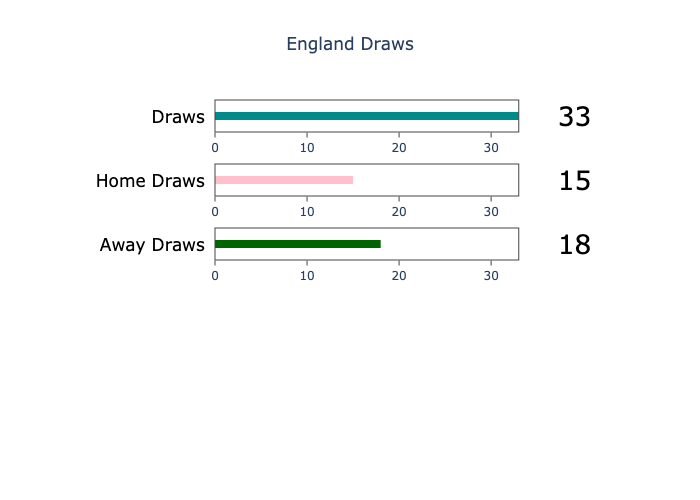

In [96]:
# Draw split

fig2 = go.Figure()

fig2.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_draws,
    domain = {'x': [0.25, 1], 'y': [0.9, 1.0]},
    title = {'text': "Draws",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_draws]},
        'bar': {'color': "darkcyan"}}))
fig2.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_home_draws,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.8]},
    title = {'text': "Home Draws",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_draws]},
        'bar': {'color': "pink"}}))
fig2.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_away_draws,
    domain = {'x': [0.25, 1], 'y': [0.5, 0.6]},
    title = {'text': "Away Draws",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_draws]},
        'bar': {'color': "darkgreen"}}))

fig2.update_layout(title=" England Draws ",title_x=0.5)
fig2.show("png")

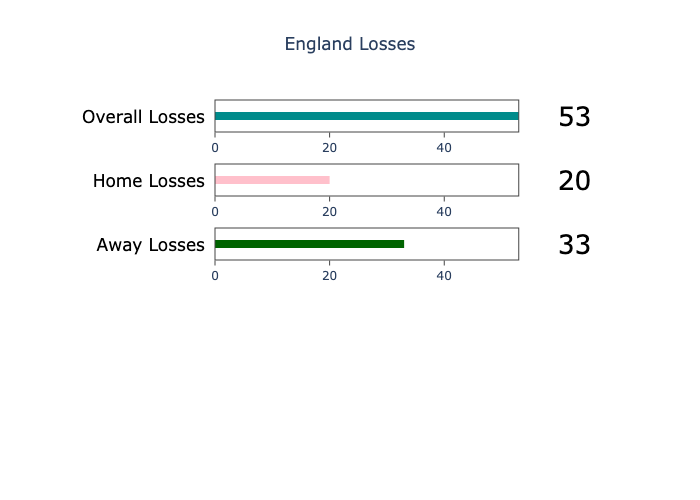

In [97]:
# Loss split

fig3 = go.Figure()

fig3.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_losses,
    domain = {'x': [0.25, 1], 'y': [0.9, 1.0]},
    title = {'text': "Overall Losses",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_losses]},
        'bar': {'color': "darkcyan"}}))
fig3.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_home_losses,
    domain = {'x': [0.25, 1], 'y': [0.7, 0.8]},
    title = {'text': "Home Losses",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_losses]},
        'bar': {'color': "pink"}}))
fig3.add_trace(go.Indicator(
    mode = "number+gauge", value =  england_away_losses,
    domain = {'x': [0.25, 1], 'y': [0.5, 0.6]},
    title = {'text': "Away Losses",'font':{'color': 'black','size':17}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, england_losses]},
        'bar': {'color': "darkgreen"}}))

fig3.update_layout(title=" England Losses ",title_x=0.5)
fig3.show("png")

By looking at these gauge charts, it's easy to see that England are more likely to Win at home, and Draw or Lose when away (which is to be expected). Across all matches, England are more likely to win a match than to lose. 

So how many times do England win matches in a year? To do this, we will need to separate the year information from the date of the match. Since we converted the date to datetime earlier in this project this is quite straightforward! 

In [98]:
# Yearly Home Win Report

# Pull out the year from the match date and create a new column
england_games['year']=england_games['date'].dt.year
data_england_home['year']=data_england_home['date'].dt.year
data_england_away['year']=data_england_away['date'].dt.year

england_games.head()

/var/folders/rg/s5mq0srx0y39_7c5_n4zxyrh0000gn/T/ipykernel_16078/1844872097.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rg/s5mq0srx0y39_7c5_n4zxyrh0000gn/T/ipykernel_16078/1844872097.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,home_team,away_team,home result,goal difference,year
0,1969-11-02,England,France,Win,2,1969
1,1979-07-19,England,Finland,Win,2,1979
2,1979-07-23,England,Switzerland,Win,2,1979
3,1982-09-19,England,Northern Ireland,Win,6,1982
4,1983-05-22,England,Scotland,Win,2,1983


In [99]:
# Pull out the data purely about home and away wins

home_results_year = data_england_home[data_england_home['home result'] == 'Win']['year']
home_results_year_new = home_results_year.value_counts().reset_index().rename(columns={'index':'year','year':'Year', 'Home or Away': 'Home or Away'})
away_results_year = data_england_away[data_england_away['home result'] == 'Loss']['year']
away_results_year_new = away_results_year.value_counts().reset_index().rename(columns={'index':'year','year':'Year'})

home_results_year_new=home_results_year_new.sort_values('Year').reset_index(drop=True)
away_results_year_new=away_results_year_new.sort_values('Year').reset_index(drop=True)

# Put this win data into a new dataframe
win_data = [home_results_year_new, away_results_year_new]
wins = pd.concat(win_data)
wins.sort_values("Year")
wins = wins.reset_index(drop=True)

# Show this new data table
wins


,Year,count
0,1969,1
1,1979,2
2,1982,1
3,1983,2
4,1984,2
5,1985,1
6,1986,2
7,1987,1
8,1990,1
9,1992,2


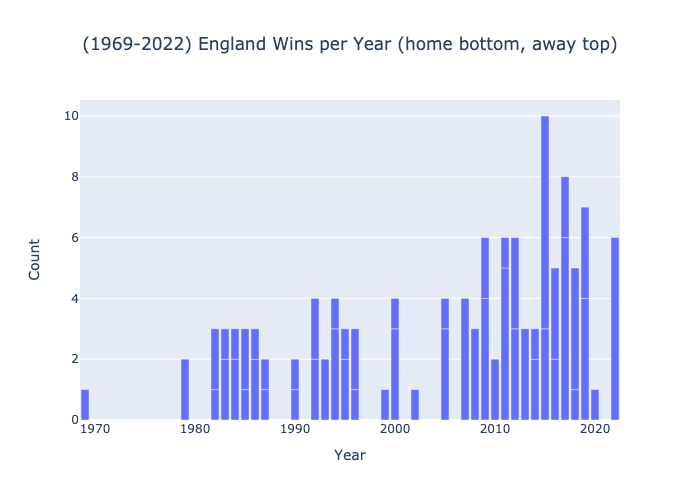

In [100]:
# Plot the win data using a Plotly bar chart

fig = go.Figure(go.Bar(
    x=wins['Year'],y=wins['count'],
    textposition = "outside",
))
fig.update_layout(title_text='(1969-2022) England Wins per Year (home bottom, away top)',xaxis_title="Year",yaxis_title="Count",title_x=0.5)
fig.show("png")

The general trend is that over time, England have won more and more matches. This could be for a few reasons:

1. Women's football has grown hugely at a sport over recent years. There are now more women's football matches and tournments than ever before and more opportunities for England to play. This automatically increases the number of match wins as there are more opportunities to win!
2. The England Women's team has gotten better at football over the years. This culminated in England winning the 2022 Women's Euros!

There are also some interesting datapoints. 2020-21 has very little data due to sport being cancelled due to the Covid-19 Pandemic. There are also repeated gaps in the data due to the fact that many international tournaments are only played every 2-4 years rather than annually. 

Data is also only available from 1969 onwards as this is when the Women's Football Association was formed. Before this, there were no official tournaments for Women's Football in England.